In [ ]:
#Cleaning Dataset

In [1]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\mamatha a u\OneDrive\Desktop\IMDb_All_Genres_etf_clean1 (1).csv", low_memory=False)

# Step 2: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Standardized columns:", df.columns.tolist())

# Step 3: Inspect the data
print("Shape:", df.shape)
print("Info:")
print(df.info())
print("Missing values:")
print(df.isnull().sum())

# Step 4: Drop columns with >50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Step 5: Fill missing values (only if columns exist)
fill_values = {}
if 'rating' in df.columns:
    fill_values['rating'] = df['rating'].mean()
if 'genre' in df.columns:
    fill_values['genre'] = 'Unknown'
if 'title' in df.columns:
    fill_values['title'] = 'Untitled'
df.fillna(value=fill_values, inplace=True)

# Step 6: Remove duplicates
df = df.drop_duplicates()

# Step 7: Fix data types
if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 8: Clean text fields
text_columns = ['title', 'genre', 'language']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

# Step 9: Normalize categorical values
if 'genre' in df.columns:
    genre_map = {
        'Sci-Fi': 'Science Fiction',
        'Rom-Com': 'Romantic Comedy',
        'Docu': 'Documentary'
    }
    df['genre'] = df['genre'].replace(genre_map)

# Step 10: Filter outliers
if 'rating' in df.columns:
    df = df[(df['rating'] >= 0) & (df['rating'] <= 10)]

# Step 11: Split multi-value columns
if 'genre' in df.columns:
    df['genre_list'] = df['genre'].str.split(',')

# Step 12: Create new features
if 'release_date' in df.columns:
    df['release_year'] = df['release_date'].dt.year
    df['release_decade'] = (df['release_year'] // 10) * 10

# Step 13: Save cleaned data
df.to_excel('IMDb_cleaned.xlsx', index=False)
print("✅ Cleaned dataset saved as IMDb_cleaned.xlsx")

Standardized columns: ['movie_title', 'year', 'director', 'actors', 'rating', 'runtime(mins)', 'censor', 'total_gross', 'main_genre', 'side_genre']
Shape: (5562, 10)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_title    5562 non-null   object 
 1   year           5562 non-null   int64  
 2   director       5562 non-null   object 
 3   actors         5562 non-null   object 
 4   rating         5562 non-null   float64
 5   runtime(mins)  5562 non-null   int64  
 6   censor         5562 non-null   object 
 7   total_gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB
None
Missing values:
movie_title      0
year             0
director         0
actors           0
rating           0
runtime(mins)

In [7]:
import pandas as pd
df = pd.read_excel(r"C:\Users\mamatha a u\OneDrive\Desktop\IMDb_cleaned.xlsx")
df['director'] = df['director'].str.replace('Directors:', '', regex=False).str.strip()
df['director'] = df['director'].str.strip()
df['actors'] = df['actors'].str.strip()
df['director'] = df['director'].str.title()
df.to_excel('IMDb_cleaned_final.xlsx', index=False)
print("✅ Cleaned dataset saved as IMDb_cleaned_final.xlsx")

✅ Cleaned dataset saved as IMDb_cleaned_final.xlsx


In [9]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print(df['rating'].head(10))

0    9.3
1    9.0
2    9.0
3    8.8
4    8.8
5    8.8
6    8.7
7    8.7
8    8.6
9    8.6
Name: rating, dtype: float64


In [11]:
import pandas as pd
df = pd.read_excel(r"C:\Users\mamatha a u\OneDrive\Desktop\IMDb_cleaned_final.xlsx")
print(df.head())

                                     movie_title  year           director  \
0                                        Kantara  2022      Rishab Shetty   
1                                The Dark Knight  2008  Christopher Nolan   
2  The Lord of the Rings: The Return of the King  2003      Peter Jackson   
3                                      Inception  2010  Christopher Nolan   
4          The Lord of the Rings: The Two Towers  2002      Peter Jackson   

                                              actors  rating  runtime(mins)  \
0  Rishab Shetty, Sapthami Gowda, Kishore Kumar G...     9.3            148   
1  Christian Bale, Heath Ledger, Aaron Eckhart, M...     9.0            152   
2  Elijah Wood, Viggo Mortensen, Ian McKellen, Or...     9.0            201   
3  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...     8.8            148   
4  Elijah Wood, Ian McKellen, Viggo Mortensen, Or...     8.8            179   

  censor   total_gross main_genre           side_genre  
0    

In [ ]:
#EDA Steps:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('IMDb_cleaned_final.xlsx')  # or use read_csv if needed

# Basic structure
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Info:")
print(df.info())
print("Summary stats:")
print(df.describe(include='all'))

Shape: (5554, 10)
Columns: Index(['movie_title', 'year', 'director', 'actors', 'rating', 'runtime(mins)',
       'censor', 'total_gross', 'main_genre', 'side_genre'],
      dtype='object')
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5554 entries, 0 to 5553
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_title    5554 non-null   object 
 1   year           5554 non-null   int64  
 2   director       5554 non-null   object 
 3   actors         5554 non-null   object 
 4   rating         5554 non-null   float64
 5   runtime(mins)  5554 non-null   int64  
 6   censor         5554 non-null   object 
 7   total_gross    5554 non-null   object 
 8   main_genre     5554 non-null   object 
 9   side_genre     5554 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.0+ KB
None
Summary stats:
       movie_title         year     director  \
count         5554  5554.000000       

In [43]:
# Missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])
print("Missing values:\n", df[['movie_title', 'year', 'director', 'actors', 'rating', 'runtime(mins)', 'censor', 'total_gross', 'main_genre', 'side_genre']].isnull().sum())

Missing values:
 Series([], dtype: int64)
Missing values:
 movie_title      0
year             0
director         0
actors           0
rating           0
runtime(mins)    0
censor           0
total_gross      0
main_genre       0
side_genre       0
dtype: int64


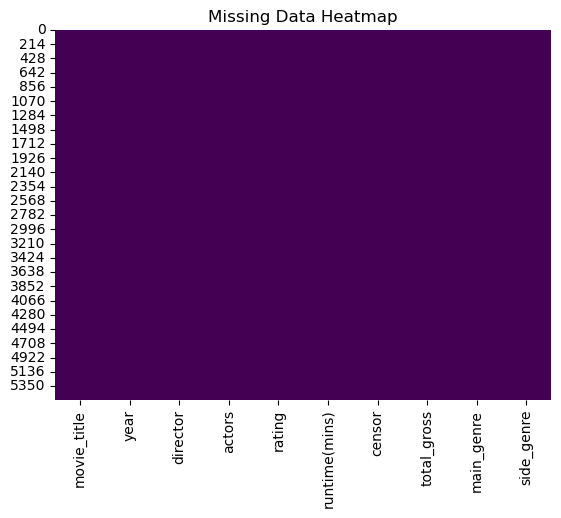

In [25]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [27]:
# Categorical distributions
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts().head(10))


Value counts for movie_title:
 movie_title
Robin Hood           3
Cinderella           3
Dracula              3
Taxi                 3
Frozen               2
Casino Royale        2
Crash                2
The Addams Family    2
Straw Dogs           2
The Great Gatsby     2
Name: count, dtype: int64

Value counts for director:
 director
Woody Allen          40
Clint Eastwood       32
Steven Spielberg     28
Ron Howard           23
Steven Soderbergh    23
Ridley Scott         21
Martin Scorsese      21
Alfred Hitchcock     21
Robert Zemeckis      18
Tim Burton           17
Name: count, dtype: int64

Value counts for actors:
 actors
William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan       6
Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers          4
Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving    3
Patrick Stewart, Jonathan Frakes, Brent Spiner, LeVar Burton        3
Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia           2
Adam Sandler

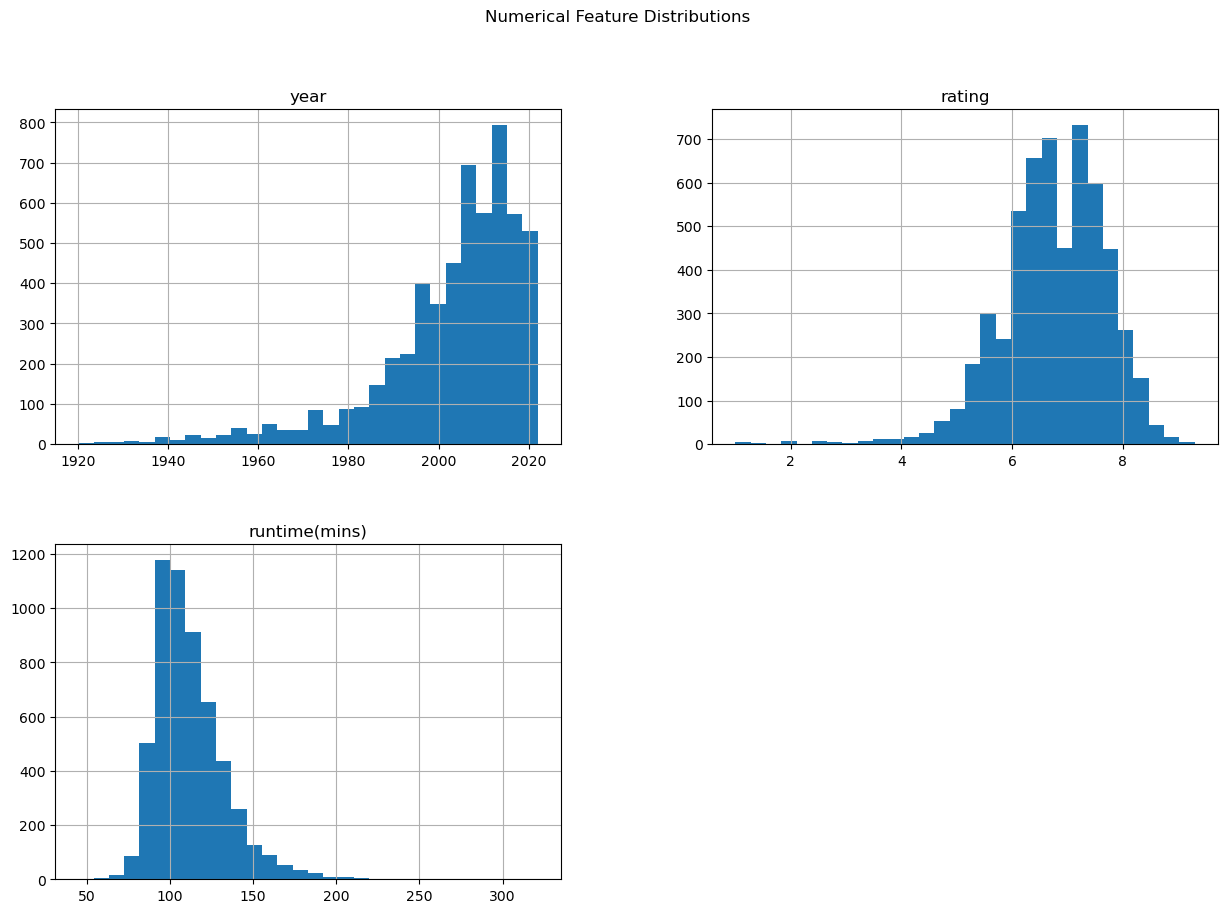

In [29]:
# Numerical distributions
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()

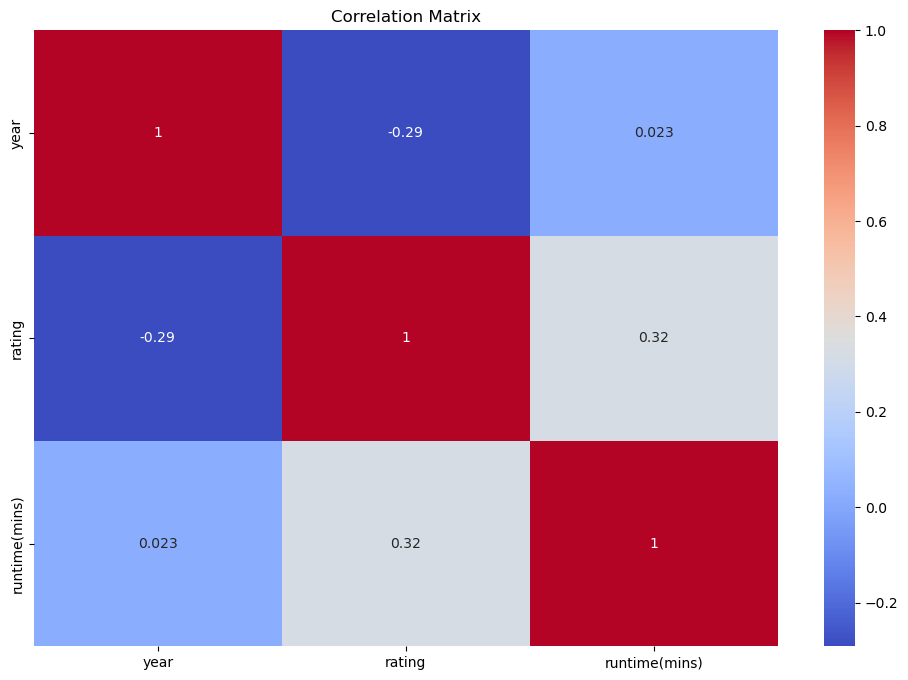

In [31]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

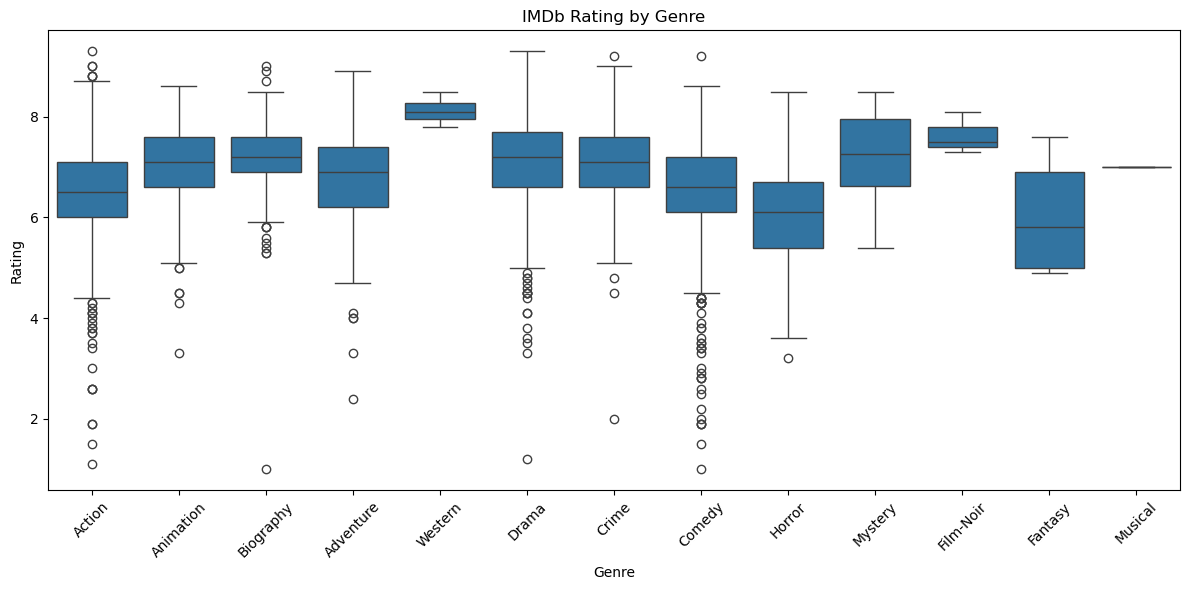

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('IMDb_cleaned_final.xlsx')

#Boxplot: IMDb rating by genre (if genre column exists)
# Check if required columns exist
if 'main_genre' in df.columns and 'rating' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='main_genre', y='rating', data=df)
    plt.xticks(rotation=45)
    plt.title("IMDb Rating by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Rating")
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'main_genre' and/or 'imdb_rating' not found in the dataset.")

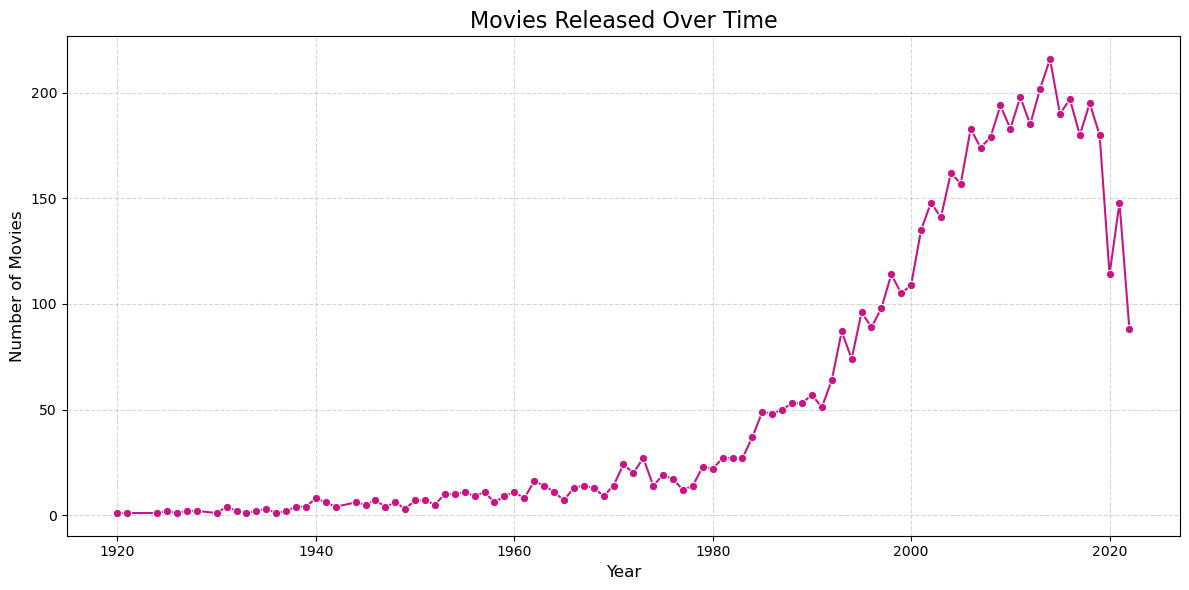

In [3]:
# Time-based analysis (if release_year column exists)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_excel('IMDb_cleaned_final.xlsx')
if 'year' in df.columns:
    # Ensure release_year is numeric
    df['release_year'] = pd.to_numeric(df['year'], errors='coerce')

    # Count movies per year
    yearly_counts = df['year'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='mediumvioletred')
    plt.title("Movies Released Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Movies", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'release_year' not found in the dataset.")

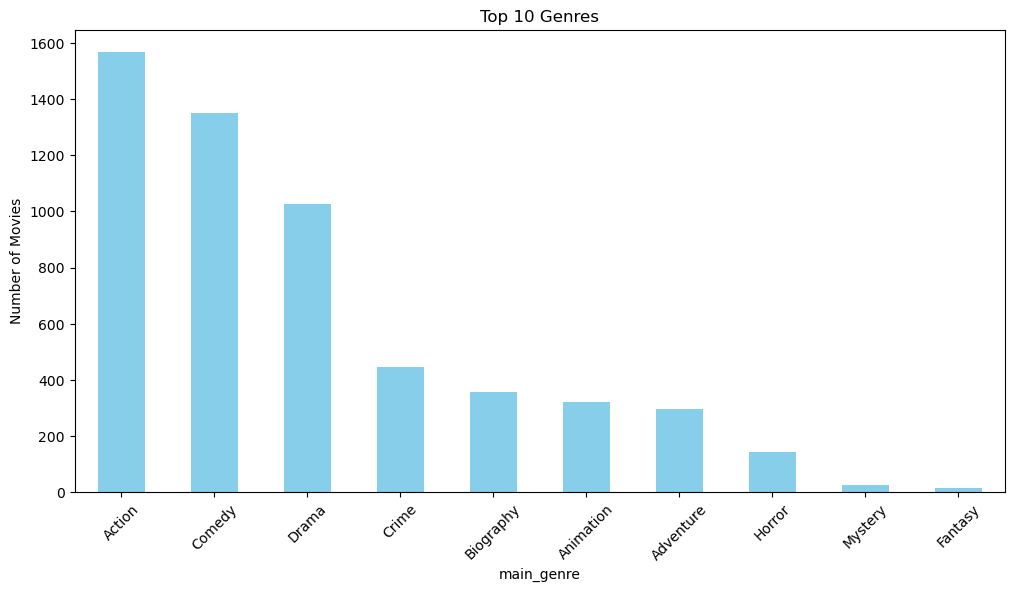

In [2]:
# Genre distribution
plt.figure(figsize=(12, 6))
df['main_genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='year', ylabel='rating'>

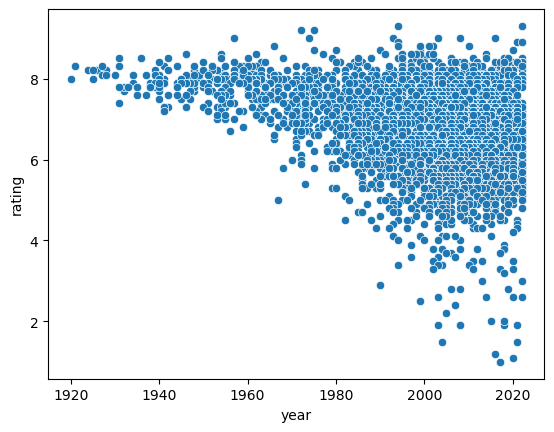

In [4]:
#Relationships Between Features
#year vs Rating
import pandas as pd
import seaborn as sns
df = pd.read_excel(r"C:\Users\mamatha a u\OneDrive\Desktop\IMDb_cleaned_final.xlsx")
sns.scatterplot(x='year', y='rating', data=df)

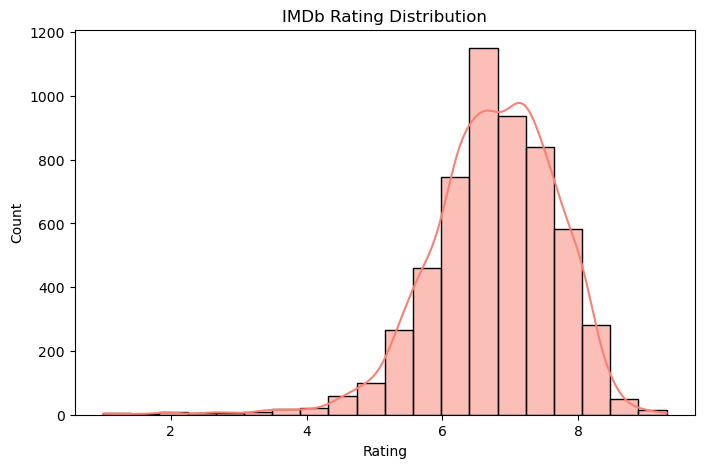

In [51]:
# IMDb rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='salmon')
plt.title("IMDb Rating Distribution")
plt.xlabel("Rating")
plt.show()

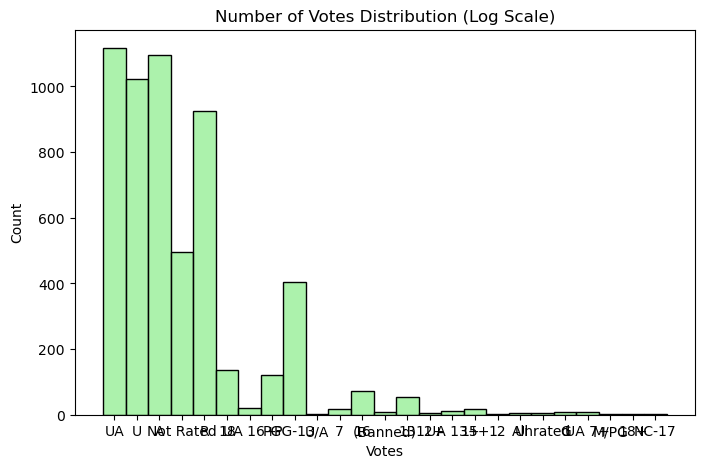

In [55]:
# Votes distribution (log scale for skewed data)
plt.figure(figsize=(8, 5))
sns.histplot(df['censor'], bins=30, log_scale=True, color='lightgreen')
plt.title("Number of Votes Distribution (Log Scale)")
plt.xlabel("Votes")
plt.show()

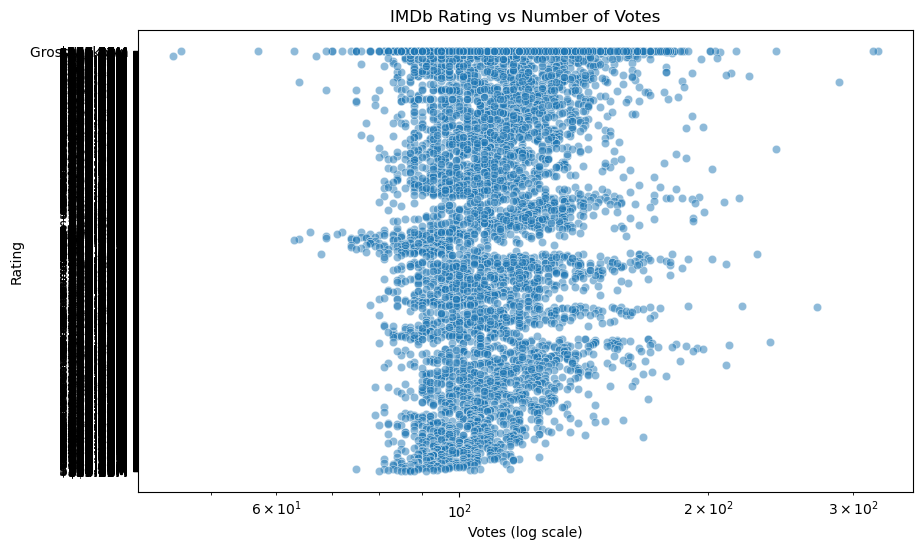

In [1]:
# Scatter plot: Rating vs Votes
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_excel('IMDb_cleaned_final.xlsx')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime(mins)', y='total_gross', data=df, alpha=0.5)
plt.xscale('log')
plt.title("IMDb Rating vs Number of Votes")
plt.xlabel("Votes (log scale)")
plt.ylabel("Rating")
plt.show()

In [ ]:
#Linear Regression Model + Spoken Output

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
df = pd.read_excel('IMDb_cleaned_final.xlsx')
print(df.columns.tolist())

['movie_title', 'year', 'director', 'actors', 'rating', 'runtime(mins)', 'censor', 'total_gross', 'main_genre', 'side_genre']


In [18]:
df = pd.read_excel('IMDb_cleaned_final.xlsx')  # or use read_csv
print(df.head())
print(df.info())

                                     movie_title  year           director  \
0                                        Kantara  2022      Rishab Shetty   
1                                The Dark Knight  2008  Christopher Nolan   
2  The Lord of the Rings: The Return of the King  2003      Peter Jackson   
3                                      Inception  2010  Christopher Nolan   
4          The Lord of the Rings: The Two Towers  2002      Peter Jackson   

                                              actors  rating  runtime(mins)  \
0  Rishab Shetty, Sapthami Gowda, Kishore Kumar G...     9.3            148   
1  Christian Bale, Heath Ledger, Aaron Eckhart, M...     9.0            152   
2  Elijah Wood, Viggo Mortensen, Ian McKellen, Or...     9.0            201   
3  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...     8.8            148   
4  Elijah Wood, Ian McKellen, Viggo Mortensen, Or...     8.8            179   

  censor   total_gross main_genre           side_genre  
0    

In [55]:
import re

def clean_gross(value):
    if pd.isnull(value):
        return 0
    value = str(value).strip()
    match = re.match(r'\$?([\d\.]+)([MK]?)', value)
    if not match:
        return 0
    num, suffix = match.groups()
    num = float(num)
    if suffix == 'M':
        return num * 1_000_000
    elif suffix == 'K':
        return num * 1_000
    else:
        return num

df['total_gross'] = df['total_gross'].apply(clean_gross)


In [9]:
features = ['runtime', 'year', 'total_gross'] + [col for col in df.columns if col.startswith('main_genre_')]
X = df[features].fillna(0).astype(float)
y = df['rating'].fillna(0).astype(float)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Read IMDB dataset (update the path as needed)
df = pd.read_excel(r'IMDb_cleaned_final.xlsx')

# Independent and dependent variables
# Example: predicting rating from year
X = df[['year']]          # Independent variable(s)
y = df['rating']          # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display sample sizes
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 4443
Testing samples: 1111


In [1]:
import pandas as pd
import pyttsx3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean data
df = pd.read_excel('IMDb_cleaned_final.xlsx')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'runtime(mins)': 'runtime'}, inplace=True)

# Clean total_gross column
import re
def clean_gross(value):
    if pd.isnull(value):
        return 0
    value = str(value).strip()
    match = re.match(r'\$?([\d\.]+)([MK]?)', value)
    if not match:
        return 0
    num, suffix = match.groups()
    num = float(num)
    if suffix == 'M':
        return num * 1_000_000
    elif suffix == 'K':
        return num * 1_000
    else:
        return num

df['total_gross'] = df['total_gross'].apply(clean_gross)

# One-hot encode genre
df = pd.get_dummies(df, columns=['main_genre'], drop_first=True)

# Define features and target
features = ['runtime', 'year', 'total_gross'] + [col for col in df.columns if col.startswith('main_genre_')]
X = df[features].fillna(0).astype(float)
y = df['rating'].fillna(0).astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Speak results
engine = pyttsx3.init()
engine.say(f"Using a Linear Regression The mean squared error is {mse:.2f}")
engine.say(f"The R squared score is {r2:.2f}")
engine.runAndWait()


Mean Squared Error: 0.6320292408956509
R² Score: 0.2677674854463745


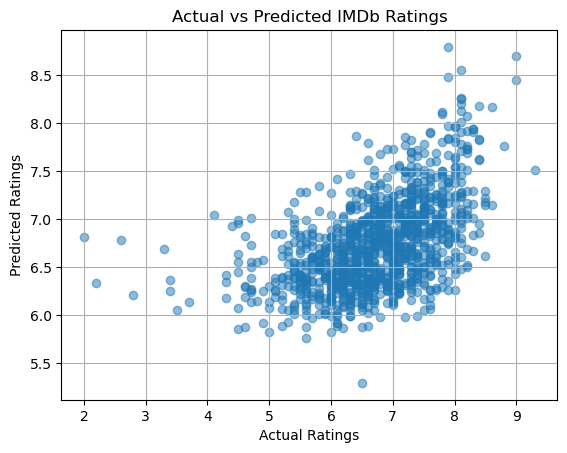

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted IMDb Ratings")
plt.grid()
plt.show()

In [25]:
#Decision Tree Regressor Model + Spoken Output

In [3]:
import pandas as pd
import pyttsx3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean data
df = pd.read_excel('IMDb_cleaned_final.xlsx')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'runtime(mins)': 'runtime'}, inplace=True)

# Clean total_gross
import re
def clean_gross(value):
    if pd.isnull(value):
        return 0
    value = str(value).strip()
    match = re.match(r'\$?([\d\.]+)([MK]?)', value)
    if not match:
        return 0
    num, suffix = match.groups()
    num = float(num)
    if suffix == 'M':
        return num * 1_000_000
    elif suffix == 'K':
        return num * 1_000
    else:
        return num

df['total_gross'] = df['total_gross'].apply(clean_gross)

# One-hot encode genre
df = pd.get_dummies(df, columns=['main_genre'], drop_first=True)

# Define features and target
features = ['runtime', 'year', 'total_gross'] + [col for col in df.columns if col.startswith('main_genre_')]
X = df[features].fillna(0).astype(float)
y = df['rating'].fillna(0).astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree MSE:", mse)
print("Decision Tree R² Score:", r2)

# Speak results
engine = pyttsx3.init()
engine.say(f"Using a Decision Tree, the mean squared error is {mse:.2f}")
engine.say(f"The R squared score is {r2:.2f}")
engine.runAndWait()


Decision Tree MSE: 0.6382800733335886
Decision Tree R² Score: 0.26052563260488526


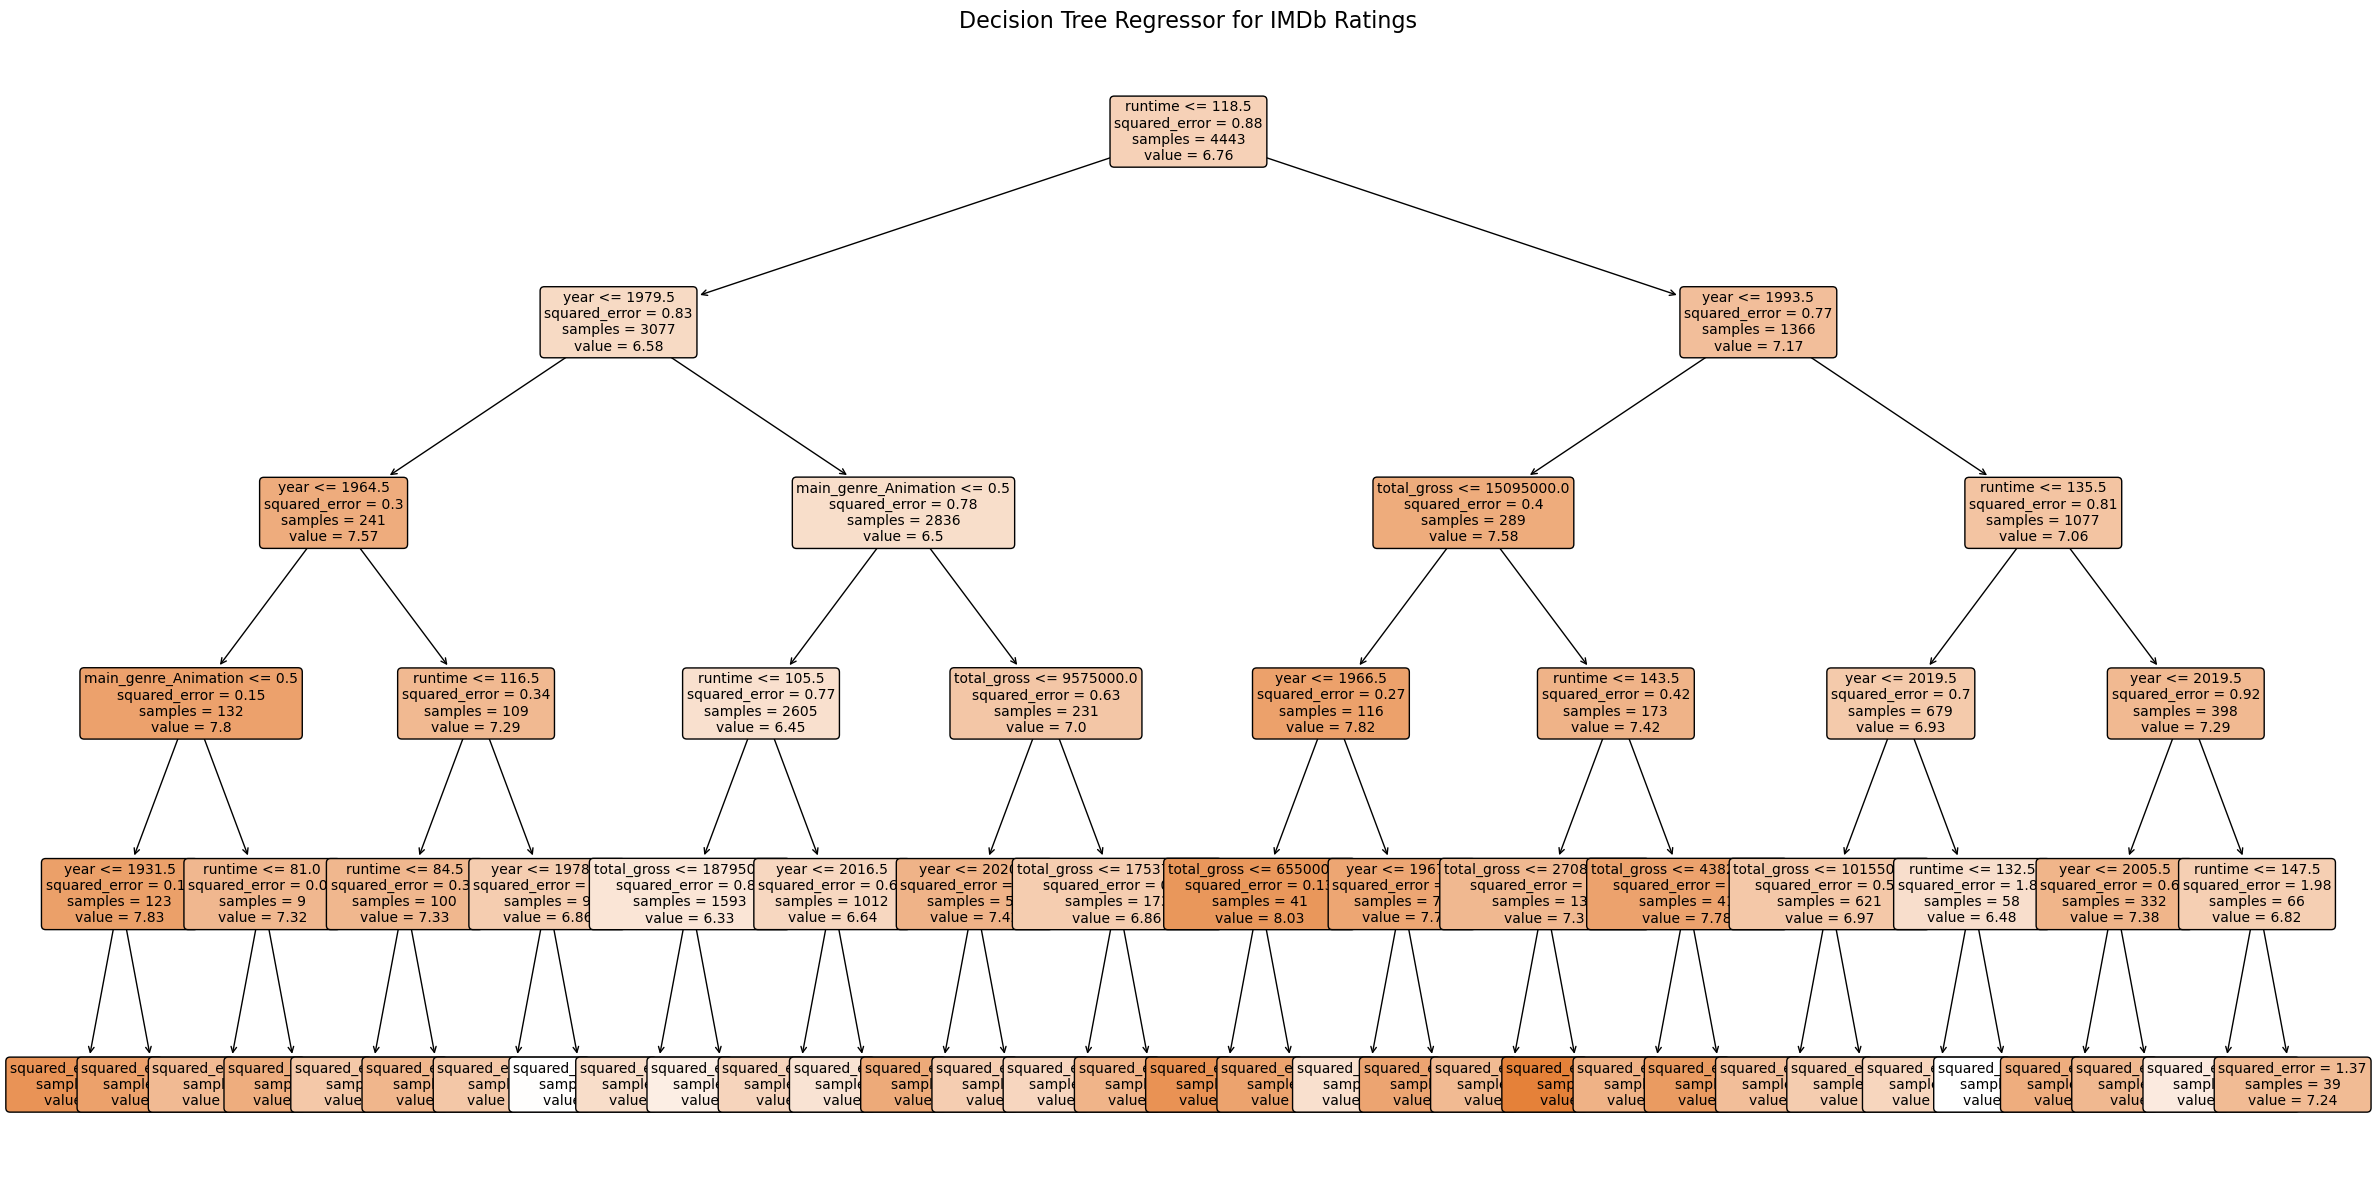

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))  # Wider canvas for clarity
plot_tree(
    tree_model,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=10,
    precision=2
)
plt.title("Decision Tree Regressor for IMDb Ratings", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
#K-Means Clustering + Spoken Output

Cluster Centers (scaled):
 [[-0.3453632   0.45217581]
 [ 1.43498794  0.71622677]
 [-0.45279656 -1.06208201]]


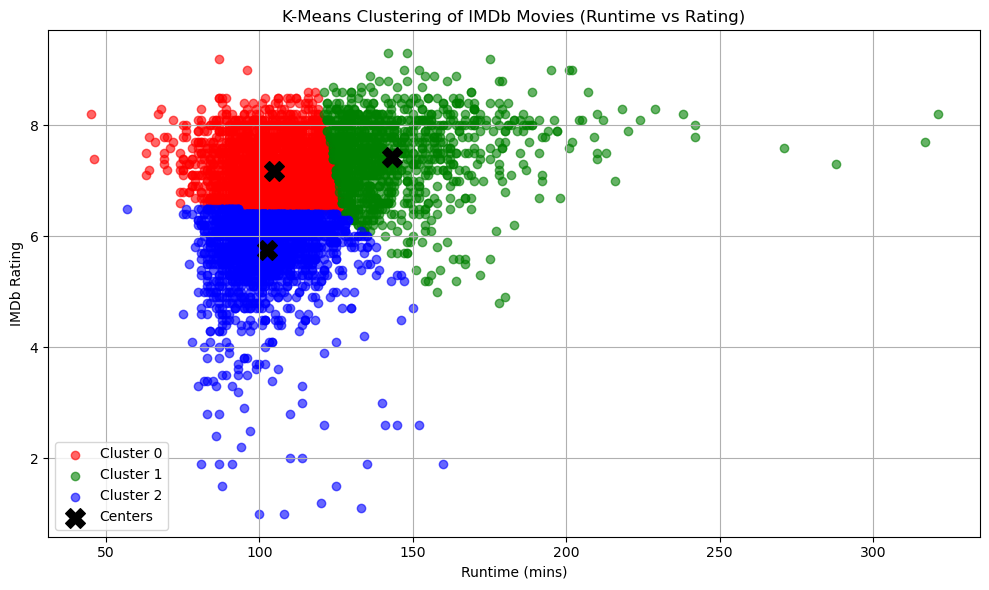

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pyttsx3
import re

#Load and clean IMDb data
df = pd.read_excel('IMDb_cleaned_final.xlsx')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'runtime(mins)': 'runtime'}, inplace=True)

#Clean rating column (if needed)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#Select features for clustering
X = df[['runtime', 'rating']].fillna(0).astype(float)

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

#Display cluster centers
print("Cluster Centers (scaled):\n", kmeans.cluster_centers_)

#Visualize clusters (runtime vs rating)
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['runtime'], cluster_data['rating'],
                label=f'Cluster {i}', alpha=0.6, color=colors[i])

#Plot cluster centers (in original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centers')

plt.xlabel('Runtime (mins)')
plt.ylabel('IMDb Rating')
plt.title('K-Means Clustering of IMDb Movies (Runtime vs Rating)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Speak cluster insights
engine = pyttsx3.init()
for i, center in enumerate(centers):
    runtime = int(center[0])
    rating = round(center[1], 2)
    engine.say(f"Cluster {i} center has average runtime of {runtime} minutes and rating of {rating}.")
engine.runAndWait()